In [29]:
from utils import *


PATH = '../data/archive/data.csv'


data = read_data_2(PATH)


N = data.shape[0] # number of alternatives
K = data.shape[1] - 1 # number of criteria
A = data.values[:, 1:] # alternatives matrix
# A = normalize_matrix_columns(A) # normalize the matrix

P = np.zeros((1, K)) # preference thresholds list for each criteria
Q = np.zeros((1, K)) # indifference thresholds list for each criteria
W = np.ones((1, K)) # weights of each criterias


P[0, :] = [0.9, 0.9] # preference parameters
Q[0, :] = [0.1, 0.1] # indifference parameters
W[0, :] = [0.2, 0.2] # weights of each criterias

data = data.drop(columns=['index'])
T_I = 0.2 # Global indifference threshold
T_J= T_I# Global incomparability threshold
P_F = 1 # Global preference factor

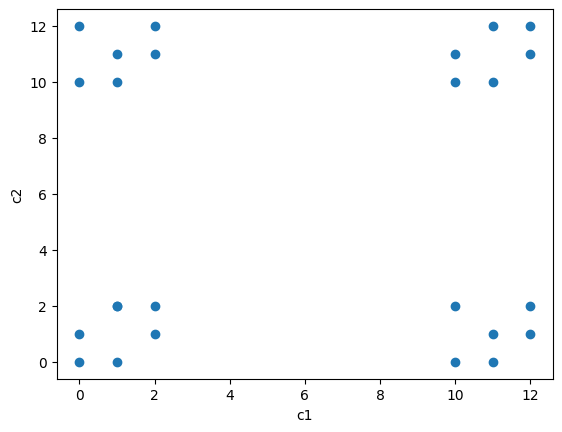

In [30]:
plt.scatter(data['c1'], data['c2'])
plt.xlabel('c1')
plt.ylabel('c2')
plt.show()

In [31]:
def linear_Pk(ai, aj, c):
    """
        Pk(a,b) for criteria k=c
        ai, aj: alternatives i and j: an array of criteria values
        c: criteria
        Returns the value of the preference function for criteria c
    """
    dk = ai[c] - aj[c]
    if dk < Q[0, c]: # if ai is indifferent to aj
        return 0
    if dk > P[0, c]:
        return 1
    return (dk - Q[0, c]) / (P[0, c] - Q[0, c])

def phi_c(ai, A, c):
    """
        phi_c(ai, A) for criteria c = mono criterion net flow score of alternative a_i for criteria c
        A: alternatives matrix
        c: criteria
        phi_c(ai, A) = sum(W[c] * linear_Pk(ai, aj, c) for aj in A)
    """
    return 1/ (N-1) * sum([(linear_Pk(ai, aj, c) - linear_Pk(aj, ai, c)) for aj in A])

def matrices_phi(A):
    """
        Returns the phi matrix for all criteria
        - Each column represents a criteria
        - Each row represents an alternative
        - Each cell represents the mono criterion net flow score of alternative a_i for criteria c
    """
    return np.array([[phi_c(ai, A, c) for c in range(K)] for ai in A])

def matrice_gamma(A):
    """
        Returns the gamma matrix
        - Each column represents an alternative
        - Each row represents an alternative
        - Each cell represents gamma(a_i, a_j) = sum(W[c] * (phi_c(ai, A, c) - phi_c(aj, A, c)) for c in range(K)) if ai > aj for criteria c
    """
    A_phi = matrices_phi(A)
    gamma = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            for c in range(K):
                if A[i, c] > A[j, c]:
                    gamma[i, j] += W[0, c] * (A_phi[i, c] - A_phi[j, c])
    return gamma

In [32]:
gamma = matrice_gamma(A)


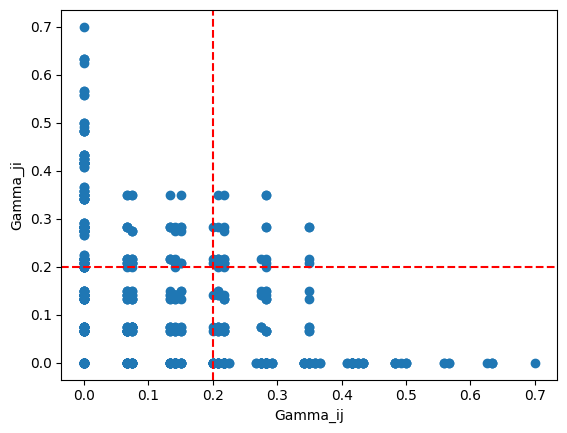

In [33]:
def plot_gamma_on_graph(gamma):
    """
        Plot the gamma matrix on a graph
        - x axis = gamma ij
        - y axis = gamma ji
    """
    fig, ax = plt.subplots()
    ax.scatter(gamma, gamma.T)
    ax.set_xlabel('Gamma_ij')
    ax.set_ylabel('Gamma_ji')

    # add TI and TJ lines (horizontal and vertical)
    ax.axhline(y=T_I, color='r', linestyle='--')
    ax.axvline(x=T_I, color='r', linestyle='--')

    plt.show()

plot_gamma_on_graph(gamma)

In [36]:
def get_eta(gamma):
    """ 
     eta(i,j) = gamma(i,j) + gamma(j,i)
    """
    return gamma + gamma.T

In [52]:
eta = get_eta(gamma)

k = 4
max_it = 100

# Select k random alternatives in A as initial centroids, select the indices of the alternatives
centroids_indices = np.random.choice(N, k, replace=False)
centroids = A[centroids_indices]

print(centroids_indices)

for it in range(max_it):
    clusters = {i: [] for i in centroids_indices} # clusters dictionary
    # Assign each alternative to the nearest centroid (nearest = max eta)
    for i in range(N): # For each alternative, assign it to the nearest centroid
        # For each centroid, calculate the eta value
        max_eta = -np.inf
        for centroid_id in centroids_indices:
            if eta[i, centroid_id] > max_eta:
                max_eta = eta[i, centroid_id]
                nearest_centroid = centroid_id
        clusters[nearest_centroid].append(i)

    # Update the centroids, compute the mean of the alternatives in each cluster
    new_centroids = np.zeros((k, K)) # k x K because we have k centroids and K criteria
    for i in range(k):
        cluster = A[clusters[centroids_indices[i]]] # Get the alternatives in the cluster
        new_centroids[i] = np.mean(cluster, axis=0) # Compute the mean of the alternatives in the cluster


    # Check if the centroids have changed
    if np.array_equal(centroids, new_centroids):
        break
    centroids = new_centroids

print(clusters)



# Plot the clusters
colors = ['r', 'g', 'b', 'y']
for i, cluster in clusters.items():
    cluster = A[cluster]
    plt.scatter(cluster[:, 0], cluster[:, 1], color=colors[i])
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x')
plt.xlabel('c1')
plt.ylabel('c2')
plt.show()


[ 9 16 14  0]
{np.int32(9): [], np.int32(16): [], np.int32(14): [], np.int32(0): []}
{np.int32(9): [], np.int32(16): [], np.int32(14): [], np.int32(0): []}
{np.int32(9): [], np.int32(16): [], np.int32(14): [], np.int32(0): []}
{np.int32(9): [], np.int32(16): [], np.int32(14): [], np.int32(0): []}
{np.int32(9): [], np.int32(16): [], np.int32(14): [], np.int32(0): []}
{np.int32(9): [], np.int32(16): [], np.int32(14): [], np.int32(0): []}
{np.int32(9): [], np.int32(16): [], np.int32(14): [], np.int32(0): []}
{np.int32(9): [], np.int32(16): [], np.int32(14): [], np.int32(0): []}
{np.int32(9): [], np.int32(16): [], np.int32(14): [], np.int32(0): []}
{np.int32(9): [], np.int32(16): [], np.int32(14): [], np.int32(0): []}
{np.int32(9): [], np.int32(16): [], np.int32(14): [], np.int32(0): []}
{np.int32(9): [], np.int32(16): [], np.int32(14): [], np.int32(0): []}
{np.int32(9): [], np.int32(16): [], np.int32(14): [], np.int32(0): []}
{np.int32(9): [], np.int32(16): [], np.int32(14): [], np.int32(

C:\Users\raphu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\_core\fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\raphu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\_core\_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


IndexError: list index out of range

In [37]:
def kmeans(data, k=2, max_iter=1000):
    """
        Apply kmeans clustering on the data

        data: the data to cluster
        k: number of clusters

        eta: the eta matrix
            - eta(i,j) = distance between data[i] and data[j]
    """
    gamma = matrice_gamma(data)
    eta = get_eta(gamma)
    

    # initialize centroids
    centroids = data[np.random.choice(data.shape[0], k, replace=False), :]
    for i in range(max_iter):
        # assign each point to the closest centroid based on eta
        clusters = np.argmin(eta[:, centroids], axis=1)
        # update centroids
        for i in range(k):
            centroids[i] = np.mean(data[clusters == i], axis=0)
    return clusters


def plot_clusters(data, clusters):
    """
        Plot the data with the clusters
    """
    plt.scatter(data['c1'], data['c2'], c=clusters)
    plt.xlabel('c1')
    plt.ylabel('c2')
    plt.show()

clusters = kmeans(A, k=4)
plot_clusters(A, clusters)

C:\Users\raphu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\_core\fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\raphu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\_core\_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


ValueError: cannot convert float NaN to integer

In [ ]:
def make_clusters(data: dataset,K,T_I=0):
    A = data.alternatives
    #1. init phase
    # a) get 1st centroid as maximizing eta_i over A
    eta_vec = u.compute_eta_vec(data)
    eta_dict = {a_i : eta_vec[i] for i,a_i in enumerate(A)}
    centroid_arr = [max(eta_dict.keys(), key=lambda x:x[1])]
    # b) get other centroids by maximizing eta_i over X (the list of centroids)
    for _ in range(1,K):

        r_k = get_most_incomparable_centroid(centroid_arr,data)
        centroid_arr.append(r_k)
    
    while True:
        cluster_arr = [[centroid] for centroid in centroid_arr]

        # Step 3: assign alternative to the nearest cluster
        for a_i in A:

            # skip centroids
            if a_i in centroid_arr:
                continue
            
            centroid_pair = None

            for k,r_k in enumerate(centroid_arr):
                gamma_ik, gamma_ki = u.compute_gamma_pair(a_i,r_k,data)
                eta_i = gamma_ik + gamma_ki
                if centroid_pair is None or centroid_pair[1] > eta_i:
                    centroid_pair = (k,eta_i)
            
            cluster_arr[centroid_pair[0]].append(a_i)

        new_centroid_arr = []
        redo = False

        for k,cluster_k in enumerate(cluster_arr):

            new_centroid = None
            value = None

            # Step 4: determine new centroid
            for a_i in cluster_k:
                summed = 0
                for a_j in cluster_k:
                    gamma_ij,gamma_ji = u.compute_gamma_pair(a_i,a_j,data)
                    summed += gamma_ij + gamma_ji
                if value is None or summed < value:
                    new_centroid = a_i
                    value = summed
            
            new_centroid_arr.append(new_centroid)
            
            #Step 5: check indifference between old and new centroid
            gamma_rk, gamma_kr = u.compute_gamma_pair(new_centroid,centroid_arr[k],data)
            redo = redo or not (gamma_rk <= T_I and gamma_kr <= T_I)

        if not redo:
            return cluster_arr, centroid_arr

        centroid_arr = new_centroid_arr

def get_most_incomparable_centroid(centroids, data:dataset):
    best = None
    for a_i in data.alternatives:
        sum = 0
        for r_k in centroids:
            gamma_ik, gamma_ki = u.compute_gamma_pair(a_i,r_k,data)
            sum += gamma_ik + gamma_ki
        if best is None or best[1] < sum:
            best = (a_i,sum)
    return best[0]

def compute_eta_vec(data:dataset):
    return [compute_eta(a_i,data) for a_i in data.alternatives]

def compute_eta(a_i,data:dataset):
    sum = 0
    for a_j in data.alternatives:
        gamma_ij, gamma_ji = compute_gamma_pair(a_i,a_j,data)
        sum += gamma_ij + gamma_ji
    return sum